In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import zscore, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score, precision_recall_fscore_support
import seaborn as sns

# NN
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader
# from torchvision import datasets, transforms

In [130]:
df = pd.read_csv('./almonds/Almond.csv')
print(df.shape)
df.describe()

(2803, 14)


,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [132]:
# Remove the Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [133]:
df.isnull().sum()



Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

<Axes: >

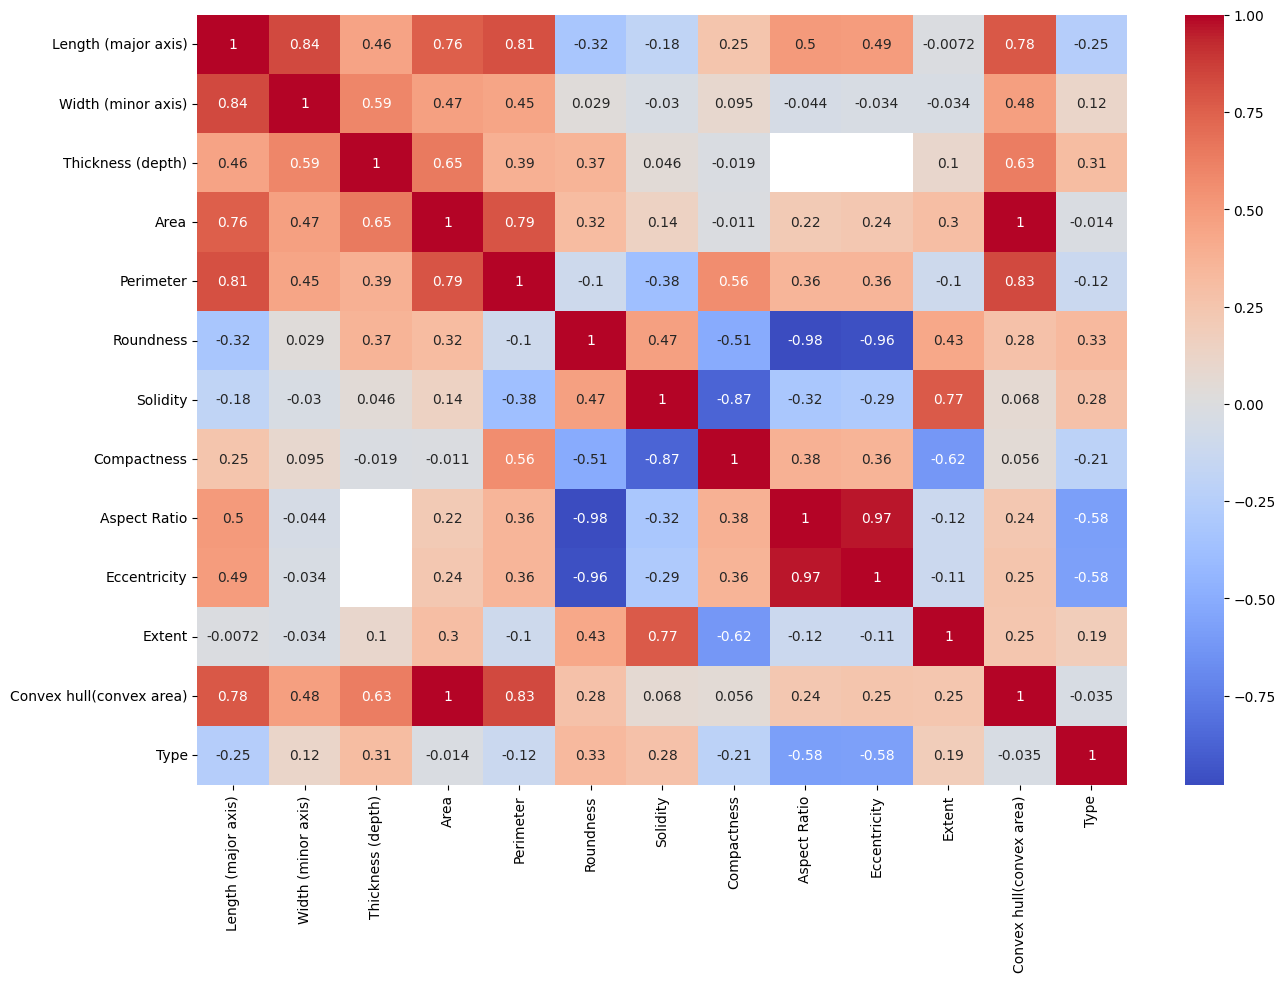

In [134]:
# Label encoding

corr_df = df.copy()
encoder = LabelEncoder()
corr_df['Type'] = encoder.fit_transform(corr_df['Type'])
# Draw correlation heatmap to see the correlation between features

corr_mat = corr_df.corr()
plt.gcf().set_size_inches(15, 10)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm') #make figure bigger
# plt.show()

In [135]:
# Fill nan values with mean of column where it is one of the almond types
df['Length (major axis)'] = df['Length (major axis)'].fillna(df['Length (major axis)'].median())
df['Width (minor axis)'] = df['Width (minor axis)'].fillna(df['Width (minor axis)'].median())
df['Thickness (depth)'] = df['Thickness (depth)'].fillna(df['Thickness (depth)'].median())
df['Aspect Ratio'] = df['Length (major axis)'] / df['Width (minor axis)']
df['Eccentricity'] = np.sqrt(1 - (df['Width (minor axis)'] / df['Length (major axis)']) ** 2)
df['Roundness'] = 4 * df['Area'] / (np.pi * df['Length (major axis)'] ** 2)

df.dropna(inplace=True)

df.isnull().sum()

/home/klairgo/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

array([[<Axes: title={'center': 'Length (major axis)'}>,
        <Axes: title={'center': 'Width (minor axis)'}>,
        <Axes: title={'center': 'Thickness (depth)'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Roundness'}>],
       [<Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'Aspect Ratio'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Convex hull(convex area)'}>]],
      dtype=object)

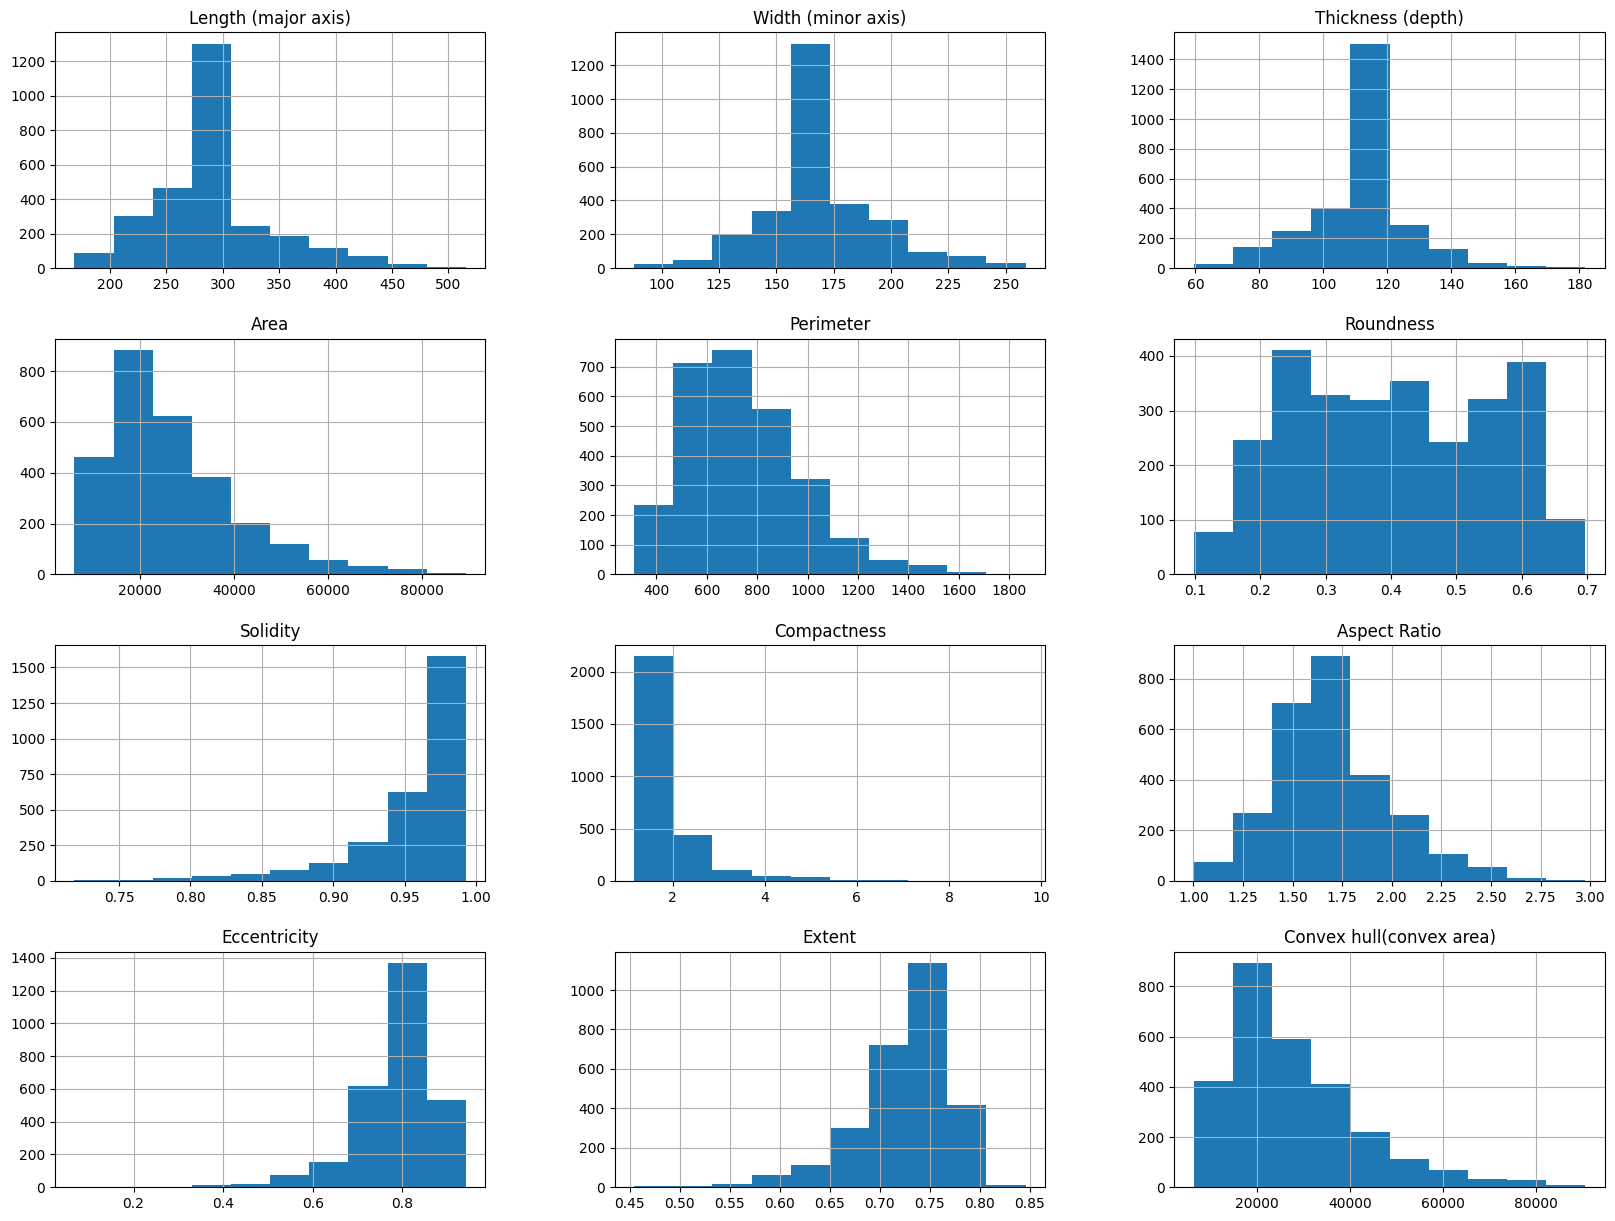

In [136]:
# Draw histograms for each column
df.hist(figsize=(20,15))

array([[<Axes: title={'center': 'Length (major axis)'}>,
        <Axes: title={'center': 'Width (minor axis)'}>,
        <Axes: title={'center': 'Thickness (depth)'}>],
       [<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Roundness'}>],
       [<Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Compactness'}>,
        <Axes: title={'center': 'Aspect Ratio'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Convex hull(convex area)'}>]],
      dtype=object)

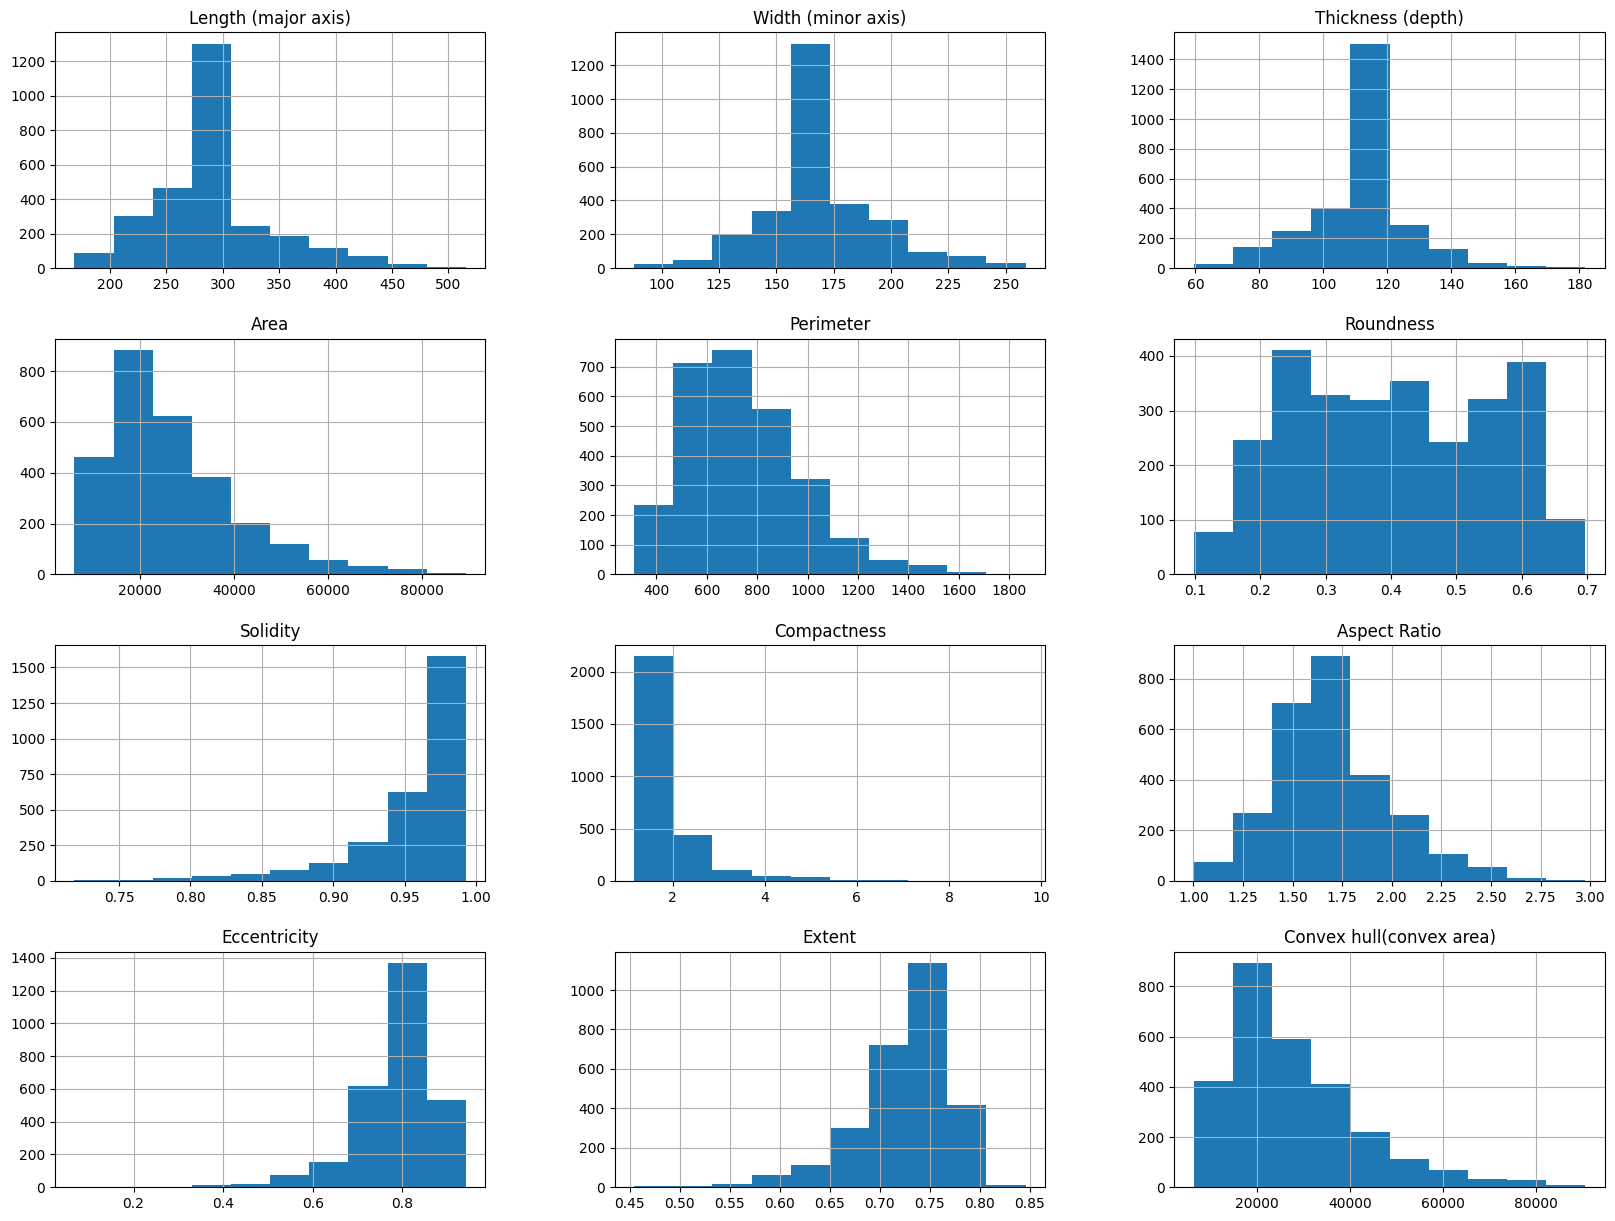

In [137]:
df.hist(figsize=(20,15))

In [144]:

scaled_X = None
# Initialize nn
class almondClassifier(nn.Module):
    def __init__(self, stack):
        super().__init__()
        self.flatten = nn.Flatten()
        self.lin_stack = stack

    def forward(self, x):
        x = self.flatten(x)
        logits = self.lin_stack(x)
        return logits

class NeuralNetwork():
    def __init__(self, loss_fn, epochs, stack, learning_rate, data_df, optimizer=optim.Adam):
        self.loss_fn = loss_fn
        self.epochs = epochs
        self. device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.learning_rate = learning_rate

        #Initialize the model
        self.model = almondClassifier(stack)

        self.optimizer_class = optimizer
        self.optimizer = optimizer(self.model.parameters(), lr=learning_rate)
        # self.optimizer = optim.Adam(model.parameters(), lr=0.0002)
        # self.optimizer = optim.Rprop(model.parameters(), lr=0.0001)

        self.preprocess(data_df)

    def preprocess(self, df):

        scalar = RobustScaler()

        X = df.drop('Type', axis=1).values
        X = scalar.fit_transform(X)

        # Encode Y using one hot ecnoding
        Y = df['Type'] 
        encoder = OneHotEncoder()
        Y = encoder.fit_transform(Y.values.reshape(-1,1)).toarray()

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

        X_train = torch.tensor(X_train).float().to(self.device)
        self.X_test = torch.tensor(X_test).float().to(self.device)
        Y_train = torch.tensor(Y_train).float().to(self.device)
        self.Y_test = torch.tensor(Y_test).float().to(self.device)

        # Create sets for k_fold
        self.X_k_train = torch.cat((X_train, self.X_test), 0)
        self.Y_k_train = torch.cat((Y_train, self.Y_test), 0)
        self.X_train, self.X_val, self.Y_train, self.Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=50, shuffle=True)


    def reset_weights(self, m):
        for layer in m.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

    def run_kfold_full(self, verbose=True, k_folds=5):

        kfold = KFold(n_splits=k_folds, shuffle=True)

        k_accuracy_val = []
        k_loss_val = []

        for fold, (train_index, val_index) in enumerate(kfold.split(self.X_k_train)):

            self.model.apply(self.reset_weights)
            self.optimizer = self.optimizer_class(self.model.parameters(), lr=self.learning_rate)

            X_train_fold = self.X_k_train[train_index]
            Y_train_fold = self.Y_k_train[train_index]
            X_val_fold = self.X_k_train[val_index]
            Y_val_fold = self.Y_k_train[val_index]


            for t in range(self.epochs):

                self.model.train()
                # Forward pass
                Y_pred = self.model(X_train_fold)
                loss = self.loss_fn(Y_pred, Y_train_fold)

                # Backward pass
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            with torch.no_grad():
                Y_pred = self.model(X_val_fold)
                val_loss = self.loss_fn(Y_pred, Y_val_fold)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_val = torch.max(Y_val_fold, dim=1)

                val_accuracy = (predicted_val == predicted_pred).float().mean().item()

            k_accuracy_val.append(val_accuracy)
            k_loss_val.append(val_loss.item())
        
        return k_accuracy_val, k_loss_val

    def run_kfold(self, batch_size=32, verbose=True, k_folds=5):

        kfold = KFold(n_splits=k_folds, shuffle=True)

        k_accuracy_val = []
        k_loss_val = []

        for fold, (train_index, val_index) in enumerate(kfold.split(self.X_k_train)):

            self.model.apply(self.reset_weights)
            self.optimizer = self.optimizer_class(self.model.parameters(), lr=self.learning_rate)

            X_train_fold = self.X_k_train[train_index]
            Y_train_fold = self.Y_k_train[train_index]
            X_val_fold = self.X_k_train[val_index]
            Y_val_fold = self.Y_k_train[val_index]

            trainloader = DataLoader(TensorDataset(X_train_fold, Y_train_fold), batch_size=batch_size, shuffle=True)

            for t in range(self.epochs):

                self.model.train()
                for X_batch, Y_batch in trainloader:

                    # Forward pass
                    Y_pred = self.model(X_batch)
                    loss = self.loss_fn(Y_pred, Y_batch)

                    # Backward pass
                    self.optimizer.zero_grad()
                    loss.backward()
                    self.optimizer.step()

            with torch.no_grad():
                Y_pred = self.model(X_val_fold)
                val_loss = self.loss_fn(Y_pred, Y_val_fold)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_val = torch.max(Y_val_fold, dim=1)

                val_accuracy = (predicted_val == predicted_pred).float().mean().item()

            k_accuracy_val.append(val_accuracy)
            k_loss_val.append(val_loss.item())
        
        return k_accuracy_val, k_loss_val

    def run_batch(self, batch_size = 32, verbose=True, graph_data=False):
        
        self.trainloader = DataLoader(TensorDataset(self.X_train, self.Y_train), batch_size=batch_size, shuffle=True)

        epoch_accuracy_train = []
        epoch_accuracy_val = []
        epoch_loss = []
        epoch_val_loss = []

        for t in range(self.epochs):
            self.model.train()
            batch_accuracy = []
            batch_loss = []
            for X_batch, Y_batch in self.trainloader:

                # Forward pass
                Y_pred = self.model(X_batch)
                loss = self.loss_fn(Y_pred, Y_batch)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_batch = torch.max(Y_batch, dim=1)

                batch_loss.append(loss.item())

                train_accuracy = (predicted_pred == predicted_batch).float().mean().item()

                batch_accuracy.append(train_accuracy)

                # Backward pass
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

            epoch_loss.append(np.mean(batch_loss))
            epoch_accuracy_train.append(100 * np.mean(batch_accuracy))
                
            with torch.no_grad():
                Y_pred = self.model(self.X_val)
                val_loss = self.loss_fn(Y_pred, self.Y_val)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_val = torch.max(self.Y_val, dim=1)

                val_accuracy = (predicted_val == predicted_pred).float().mean().item()

                epoch_accuracy_val.append(100* val_accuracy)
                epoch_val_loss.append(val_loss.item())

            if t % 50 == 0 and verbose:
                print(f'Epoch {t} | Loss: {loss.item()} | Accuracy: {train_accuracy} | Validataion Accuracy: {val_accuracy} | Validation Loss: {val_loss.item()}')
        
        with torch.no_grad():
            # Get model f1-score
            Y_pred = self.model(self.X_test)
            test_loss = self.loss_fn(Y_pred, self.Y_test).item()

            _, predicted_pred = torch.max(Y_pred, dim=1)
            _, predicted_test = torch.max(self.Y_test, dim=1)

            test_accuracy = (predicted_test == predicted_pred).float().mean().item()
            test_f1_scr = f1_score(predicted_test, predicted_pred, average=None)
            test_prec_recall = precision_recall_fscore_support(predicted_test, predicted_pred, average=None, labels=[0, 1, 2], zero_division=0) 

            if verbose:
                print('Testing Data')
                print(f'Accuracy: {test_accuracy}')
                print(f'F1 Score: {test_f1_scr.mean()}')
                print(f'Precision: {test_prec_recall[0].mean()}')
                print(f'Recall: {test_prec_recall[1].mean()}')

                fig,pos = plt.subplots(2,1,figsize=(7,7))
                pos[0].plot(range(self.epochs),epoch_loss, label="Train Loss")
                pos[0].plot(range(self.epochs),epoch_val_loss, label="Validation Loss")
                pos[0].set_xlabel("Epochs")
                pos[0].set_ylabel("Losses")
                pos[0].set_title("Losses")
                pos[0].legend()
                pos[1].plot(range(self.epochs),epoch_accuracy_train,label="Train Accuracy")
                pos[1].plot(range(self.epochs),epoch_accuracy_val,label="Test Accuracy")
                pos[1].set_xlabel("Epochs")
                pos[1].set_ylabel("Accuracies")
                pos[1].set_title("Train and test accuracies")
                pos[1].legend()
                plt.tight_layout()
            
            if graph_data:
                return epoch_accuracy_train, epoch_accuracy_val, epoch_loss, epoch_val_loss
            else:
                return test_accuracy, test_loss

    def run_full(self, verbose=True, graph_data=False):

        epoch_accuracy_train = []
        epoch_accuracy_val = []
        epoch_loss = []
        epoch_val_loss = []

        for t in range(self.epochs):

            # Forward pass
            Y_pred = self.model(self.X_train)
            loss = self.loss_fn(Y_pred, self.Y_train)

            _, predicted_pred = torch.max(Y_pred, dim=1)
            _, predicted_val = torch.max(self.Y_train, dim=1)

            train_accuracy = (predicted_val == predicted_pred).float().mean().item()

            # Backward pass
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            epoch_loss.append(loss)
            epoch_accuracy_train.append(100 * train_accuracy)
            
            with torch.no_grad():
                Y_pred = self.model(self.X_val)
                val_loss = self.loss_fn(Y_pred, self.Y_val)

                _, predicted_pred = torch.max(Y_pred, dim=1)
                _, predicted_val = torch.max(self.Y_val, dim=1)

                val_accuracy = (predicted_pred == predicted_val).float().mean().item()
                epoch_accuracy_val.append(100* val_accuracy)
                epoch_val_loss.append(val_loss.item())

            if t % 50 == 0 and verbose:
                print(f'Epoch {t} | Loss: {loss.item()} | Accuracy: {train_accuracy} | Validation Accuracy: {val_accuracy} | Validation Loss: {val_loss.item()}')

        with torch.no_grad():
            # Get model f1-score
            Y_pred = self.model(self.X_test)
            test_loss = self.loss_fn(Y_pred, self.Y_test).item()

            _, predicted_pred = torch.max(Y_pred, dim=1)
            _, predicted_test = torch.max(self.Y_test, dim=1)

            test_accuracy = (predicted_pred == predicted_test).float().mean().item()
            test_f1_scr = f1_score(predicted_test, predicted_pred, average=None)
            test_prec_recall = precision_recall_fscore_support(predicted_test, predicted_pred, average=None, labels=[0, 1, 2], zero_division=0) 

            if verbose:
                print('Testing Data')
                print(f'Accuracy: {test_accuracy}')
                print(f'F1 Score: {test_f1_scr.mean()}')
                print(f'Precision: {test_prec_recall[0].mean()}')
                print(f'Recall: {test_prec_recall[1].mean()}')

                fig,pos = plt.subplots(2,1,figsize=(7,7))
                pos[0].plot(range(self.epochs),epoch_loss, label="Train Loss")
                pos[0].plot(range(self.epochs),epoch_val_loss, label="Validation Loss")
                pos[0].set_xlabel("Epochs")
                pos[0].set_ylabel("Losses")
                pos[0].set_title("Losses")
                pos[0].legend()
                pos[1].plot(range(self.epochs),epoch_accuracy_train,label="Train Accuracy")
                pos[1].plot(range(self.epochs),epoch_accuracy_val,label="Validation Accuracy")
                pos[1].set_xlabel("Epochs")
                pos[1].set_ylabel("Accuracies")
                pos[1].set_title("Train and test accuracies")
                pos[1].legend()
                plt.tight_layout()

            if graph_data:
                return epoch_accuracy_train, epoch_accuracy_val, epoch_loss, epoch_val_loss
            else:
                return test_accuracy, test_loss


Epoch 0 | Loss: 0.2406960427761078 | Accuracy: 0.4032258093357086 | Validataion Accuracy: 0.35223880410194397 | Validation Loss: 0.22847013175487518
Epoch 50 | Loss: 0.05772073194384575 | Accuracy: 0.9032257795333862 | Validataion Accuracy: 0.7671641707420349 | Validation Loss: 0.11741218715906143
Epoch 100 | Loss: 0.053385477513074875 | Accuracy: 0.8870967626571655 | Validataion Accuracy: 0.7835820913314819 | Validation Loss: 0.11075961589813232
Epoch 150 | Loss: 0.021166637539863586 | Accuracy: 0.9838709831237793 | Validataion Accuracy: 0.7955223917961121 | Validation Loss: 0.11083627492189407
Epoch 200 | Loss: 0.00938431080430746 | Accuracy: 1.0 | Validataion Accuracy: 0.8059701323509216 | Validation Loss: 0.1137741357088089
Epoch 250 | Loss: 0.008222020231187344 | Accuracy: 1.0 | Validataion Accuracy: 0.8089552521705627 | Validation Loss: 0.11330768465995789
Testing Data
Accuracy: 0.8586761951446533
F1 Score: 0.857678803045605
Precision: 0.8576608239993463
Recall: 0.858313440522301

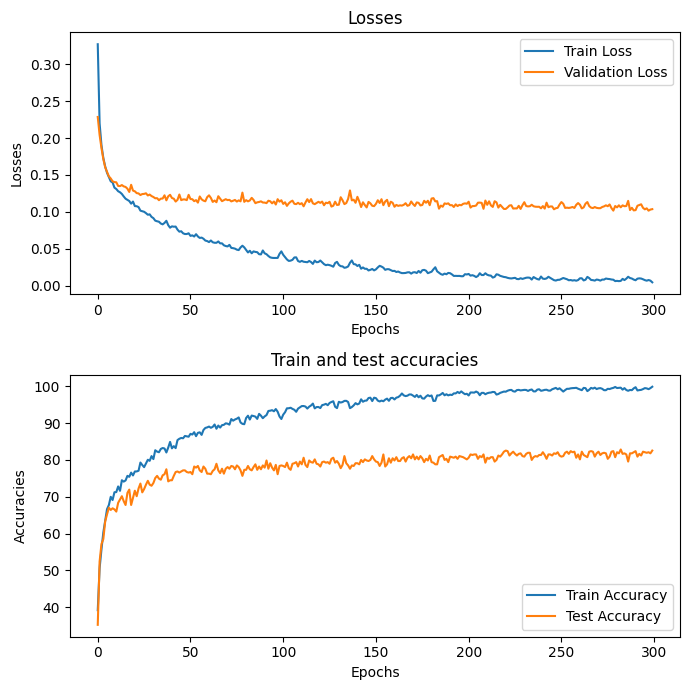

In [139]:
act_funct = nn.LeakyReLU()

stack = nn.Sequential(
    nn.Linear(12, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 32),
    act_funct,
    nn.Linear(32, 3),
)

accuracy = []
loss = []

model = NeuralNetwork(nn.MSELoss(),300 , stack, 0.001, df)
test_accuracy, test_loss = model.run_batch(100, True)
# test_accuracy, test_loss = model.run_full(True)
accuracy.append(test_accuracy)
loss.append(test_loss)

# Hyperparamter Optimization
## 1.1 Architecture

In [109]:
act_funct = nn.LeakyReLU()

# Arc1
stack = nn.Sequential(
    nn.Linear(12, 64),
    act_funct,
    nn.Linear(64, 64),
    act_funct,
    nn.Linear(64, 32),
    act_funct,
    nn.Linear(32, 3),
)
accuracy = []
loss = []

model = NeuralNetwork(nn.MSELoss(),300 , stack, 0.001, df)
test_accuracy, test_loss = model.run_kfold(100, False)
accuracy.append(test_accuracy)
loss.append(test_loss)

print('-'*20 + 'Arc1' + '-'*20)
print(f'Accuracies {accuracy}')
print(f'Losses {loss}')
print(f'Average accuracy {np.mean(accuracy)}')
print(f'Average loss {np.mean(loss)}')

# Arc2
stack = nn.Sequential(
    nn.Linear(12, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 32),
    act_funct,
    nn.Linear(32, 3),
)
accuracy = []
loss = []

model = NeuralNetwork(nn.MSELoss(),300 , stack, 0.001, df)
test_accuracy, test_loss = model.run_kfold(100, False)

model.reset_weights(model.model)

accuracy.append(test_accuracy)
loss.append(test_loss)

print('-'*20 + 'Arc2' + '-'*20)
print(f'Accuracies {accuracy}')
print(f'Losses {loss}')
print(f'Average accuracy {np.mean(accuracy)}')
print(f'Average loss {np.mean(loss)}')

# Arc3
stack = nn.Sequential(
    nn.Linear(12, 256),
    act_funct,
    nn.Linear(256, 256),
    act_funct,
    nn.Linear(256, 256),
    act_funct,
    nn.Linear(256, 256),
    act_funct,
    nn.Linear(256, 64),
    act_funct,
    nn.Linear(64, 3),
)
accuracy = []
loss = []

model = NeuralNetwork(nn.MSELoss(),300 , stack, 0.001, df)
test_accuracy, test_loss = model.run_kfold(100, False)
accuracy.append(test_accuracy)
loss.append(test_loss)

print('-'*20 + 'Arc3' + '-'*20)
print(f'Accuracies {accuracy}')
print(f'Losses {loss}')
print(f'Average accuracy {np.mean(accuracy)}')
print(f'Average loss {np.mean(loss)}')

--------------------Arc1--------------------
Accuracies [[0.8425760269165039, 0.8225806355476379, 0.8476702570915222, 0.8261649012565613, 0.8405017852783203]]
Losses [[0.09348291158676147, 0.09686706960201263, 0.09412997215986252, 0.09356282651424408, 0.09197712689638138]]
Average accuracy 0.8358987212181092
Average loss 0.09400398135185242
--------------------Arc2--------------------
Accuracies [[0.8783541917800903, 0.8620071411132812, 0.8691756129264832, 0.8548387289047241, 0.8870967626571655]]
Losses [[0.059410564601421356, 0.09103947877883911, 0.07456965744495392, 0.0852152407169342, 0.06006568670272827]]
Average accuracy 0.8702944874763489
Average loss 0.07406012564897538
--------------------Arc3--------------------
Accuracies [[0.8872987627983093, 0.8494623899459839, 0.8440860509872437, 0.8387096524238586, 0.8494623899459839]]
Losses [[0.06350275874137878, 0.07835320383310318, 0.08626444637775421, 0.0827101469039917, 0.08055885881185532]]
Average accuracy 0.8538038492202759
Avera

## 1.2 Epochs and Learning Rate

In [18]:
learning_rate = [0.01, 0.001, 0.0001, 0.00001]
epochs = [50, 100, 200, 300, 400, 500]

act_funct = nn.LeakyReLU()

param1 = []
param2 = []
accuracy = []
loss = []

for i, lr in enumerate(learning_rate):
    for j, epoch in enumerate(epochs):
        stack = nn.Sequential(
            nn.Linear(12, 128),
            act_funct,
            nn.Linear(128, 128),
            act_funct,
            nn.Linear(128, 128),
            act_funct,
            nn.Linear(128, 32),
            act_funct,
            nn.Linear(32, 3),
        )
        test_accuracy_arr = []

        print(f"Learning Rate: {lr} | Epochs: {epoch}")

        model = NeuralNetwork(nn.MSELoss(), epoch, stack, lr, df)
        test_accuracy, test_loss, = model.run_kfold(100, False)

        for i in range(len(test_accuracy)):
            param1.append(lr)
            param2.append(epoch)
            accuracy.append(test_accuracy[i])
            loss.append(test_loss[i])


data = {
    'Learning Rate': param1,
    'Epochs': param2,
    'Accuracy': accuracy,
    'Loss': loss
}

results = pd.DataFrame(data)

Learning Rate: 0.01 | Epochs: 50
Learning Rate: 0.01 | Epochs: 100
Learning Rate: 0.01 | Epochs: 200
Learning Rate: 0.01 | Epochs: 300
Learning Rate: 0.01 | Epochs: 400
Learning Rate: 0.01 | Epochs: 500
Learning Rate: 0.001 | Epochs: 50
Learning Rate: 0.001 | Epochs: 100
Learning Rate: 0.001 | Epochs: 200
Learning Rate: 0.001 | Epochs: 300
Learning Rate: 0.001 | Epochs: 400
Learning Rate: 0.001 | Epochs: 500
Learning Rate: 0.0001 | Epochs: 50
Learning Rate: 0.0001 | Epochs: 100
Learning Rate: 0.0001 | Epochs: 200
Learning Rate: 0.0001 | Epochs: 300
Learning Rate: 0.0001 | Epochs: 400
Learning Rate: 0.0001 | Epochs: 500
Learning Rate: 1e-05 | Epochs: 50
Learning Rate: 1e-05 | Epochs: 100
Learning Rate: 1e-05 | Epochs: 200
Learning Rate: 1e-05 | Epochs: 300
Learning Rate: 1e-05 | Epochs: 400
Learning Rate: 1e-05 | Epochs: 500


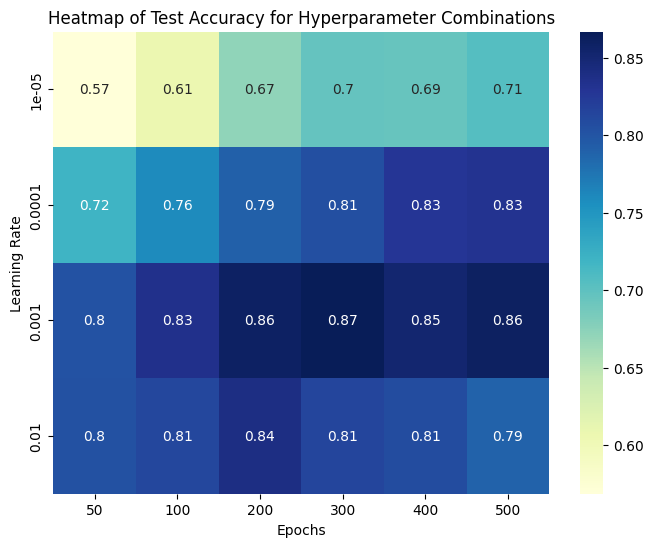

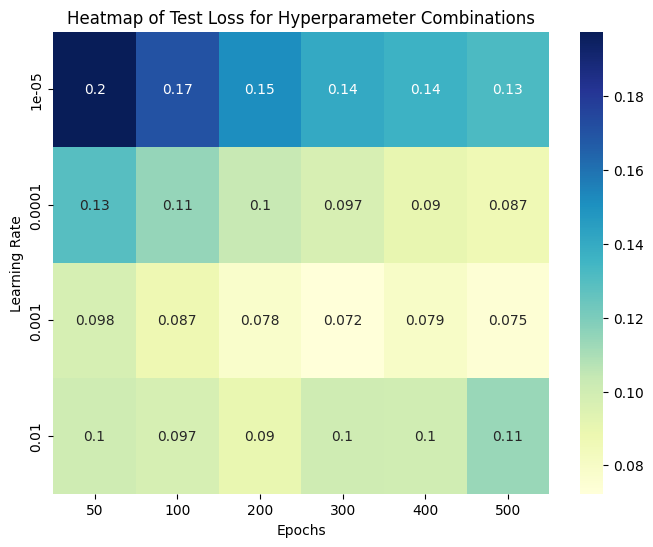

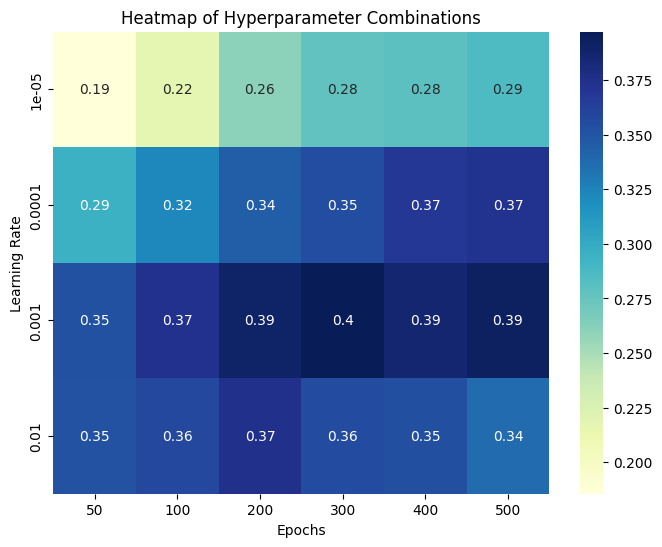

T-statistic: -5.155004417303033
P-value: 3.1964682579004923e-06


In [20]:
# Combine accuracy and loss
alpha = 0.5
beta = 0.5

results['Combined'] = alpha * results['Accuracy'] - beta * results['Loss']

pivot_table = pd.pivot_table(results, values='Accuracy', index='Learning Rate', columns='Epochs')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Test Accuracy for Hyperparameter Combinations')
plt.ylabel('Learning Rate')
plt.xlabel('Epochs')
plt.show()

pivot_table = pd.pivot_table(results, values='Loss', index='Learning Rate', columns='Epochs')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Test Loss for Hyperparameter Combinations')
plt.ylabel('Learning Rate')
plt.xlabel('Epochs')
plt.show()

pivot_table = pd.pivot_table(results, values='Combined', index='Learning Rate', columns='Epochs')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Hyperparameter Combinations')
plt.ylabel('Learning Rate')
plt.xlabel('Epochs')
plt.show()

comb_1 = results[results['Learning Rate'] == 0.01]['Combined']
comb_2 = results[results['Learning Rate'] == 0.001]['Combined']

t_stat, p_value = ttest_ind(comb_1, comb_2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

## 1.3 Loss function and Activation Function

In [27]:
loss_functions = [nn.CrossEntropyLoss, nn.L1Loss, nn.MSELoss, nn.HuberLoss]
activation_functions = [nn.ReLU, nn.LeakyReLU, nn.Tanh, nn.Sigmoid, nn.Softplus]

param1 = []
param2 = []
accuracy = []
loss = []

for i, act in enumerate(activation_functions):
    print("Activation Function: ", act)
    for j, lossf in enumerate(loss_functions):
        stack = nn.Sequential(
            nn.Linear(12, 128),
            act(),
            nn.Linear(128, 128),
            act(),
            nn.Linear(128, 128),
            act(),
            nn.Linear(128, 32),
            act(),
            nn.Linear(32, 3),
        )
        test_accuracy_arr = []

        model = NeuralNetwork(lossf(), 300, stack, 0.001, df)
        test_accuracy, test_loss, = model.run_kfold(100, False)

        for i in range(len(test_accuracy)):
            param1.append(act.__name__)
            param2.append(lossf.__name__)
            accuracy.append(test_accuracy[i])
            loss.append(test_loss[i])

data = {
    'Activation Function': param1,
    'Loss Function': param2,
    'Accuracy': accuracy,
    'Loss': loss
}

results_la = pd.DataFrame(data)

Activation Function:  <class 'torch.nn.modules.activation.ReLU'>
Activation Function:  <class 'torch.nn.modules.activation.LeakyReLU'>
Activation Function:  <class 'torch.nn.modules.activation.Tanh'>
Activation Function:  <class 'torch.nn.modules.activation.Sigmoid'>
Activation Function:  <class 'torch.nn.modules.activation.Softplus'>


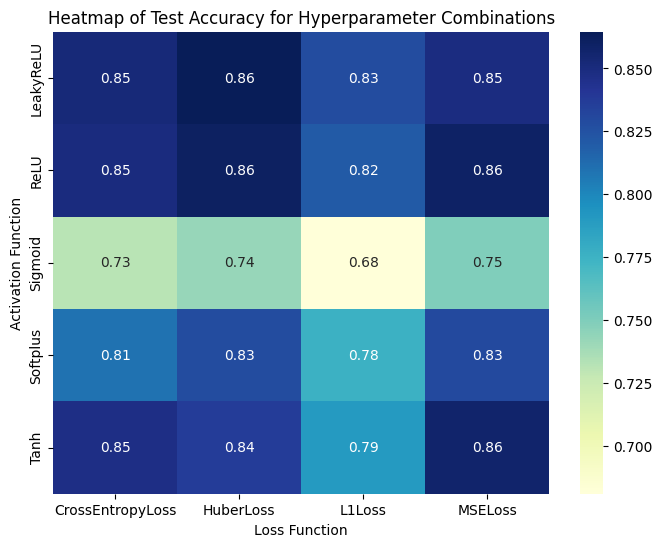

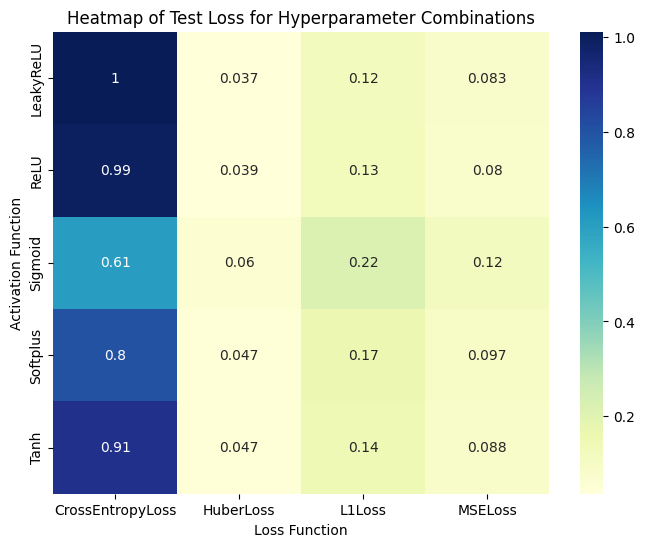

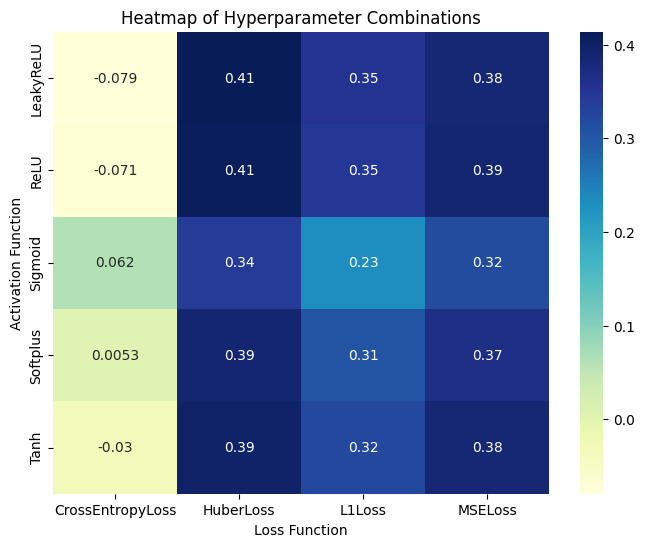

T-statistic: -0.8118539018424311
P-value: 0.42088342247125043


In [24]:
alpha = 0.5
beta = 0.5

results_la['Combined'] = alpha * results_la['Accuracy'] - beta * results_la['Loss']

pivot_table = pd.pivot_table(results_la, values='Accuracy', index='Activation Function', columns='Loss Function')

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Test Accuracy for Hyperparameter Combinations')
plt.xlabel('Loss Function')
plt.ylabel('Activation Function')
plt.show()

pivot_table = pd.pivot_table(results_la, values='Loss', index='Activation Function', columns='Loss Function')

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Test Loss for Hyperparameter Combinations')
plt.xlabel('Loss Function')
plt.ylabel('Activation Function')
plt.show()

pivot_table = pd.pivot_table(results_la, values='Combined', index='Activation Function', columns='Loss Function')

# Plotting the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

# Adding labels and a title
plt.title('Heatmap of Hyperparameter Combinations')
plt.xlabel('Loss Function')
plt.ylabel('Activation Function')
plt.show()

accuracy_param1 = results_la[results_la['Loss Function'] == 'CrossEntropyLoss']['Accuracy']
accuracy_param2 = results_la[results_la['Loss Function'] == 'MSELoss']['Accuracy']

# Perform an independent t-test between the two sets of accuracies
t_stat, p_value = ttest_ind(accuracy_param1, accuracy_param2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Comparing RProp and Adam
## 2.1 Batch processing

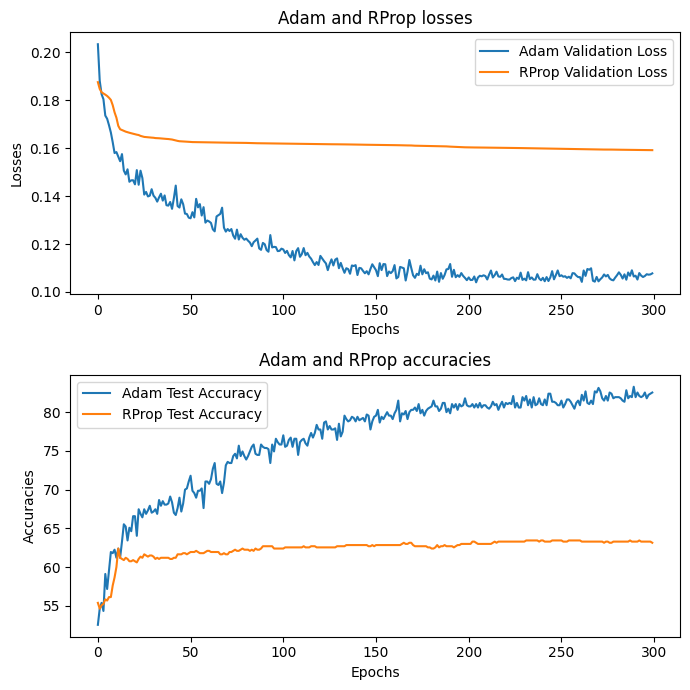

In [87]:
act_funct = nn.Tanh()
num_epochs = 300

stack = nn.Sequential(
    nn.Linear(12, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 32),
    act_funct,
    nn.Linear(32, 3),
)

model = NeuralNetwork(nn.MSELoss(), num_epochs , stack, 0.001, df, optim.Rprop)
epoch_accuracy_train, epoch_accuracy_val, epoch_loss, epoch_val_loss = model.run_batch(100, False, True)

stack = nn.Sequential(
    nn.Linear(12, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 32),
    act_funct,
    nn.Linear(32, 3),
)

model = NeuralNetwork(nn.MSELoss(), num_epochs , stack, 0.001, df, optim.Adam)
epoch_accuracy_train_a, epoch_accuracy_val_a, epoch_loss_a, epoch_val_loss_a = model.run_batch(100, False, True)

fig,pos = plt.subplots(2,1,figsize=(7,7))
pos[0].plot(range(num_epochs),epoch_val_loss_a, label="Adam Validation Loss")
pos[0].plot(range(num_epochs),epoch_val_loss, label="RProp Validation Loss")
pos[0].set_xlabel("Epochs")
pos[0].set_ylabel("Losses")
pos[0].set_title("Adam and RProp losses")
pos[0].legend()
pos[1].plot(range(num_epochs),epoch_accuracy_val_a,label="Adam Test Accuracy")
pos[1].plot(range(num_epochs),epoch_accuracy_val,label="RProp Test Accuracy")
pos[1].set_xlabel("Epochs")
pos[1].set_ylabel("Accuracies")
pos[1].set_title("Adam and RProp accuracies")
pos[1].legend()
plt.tight_layout()



## 2.2 Learning rate

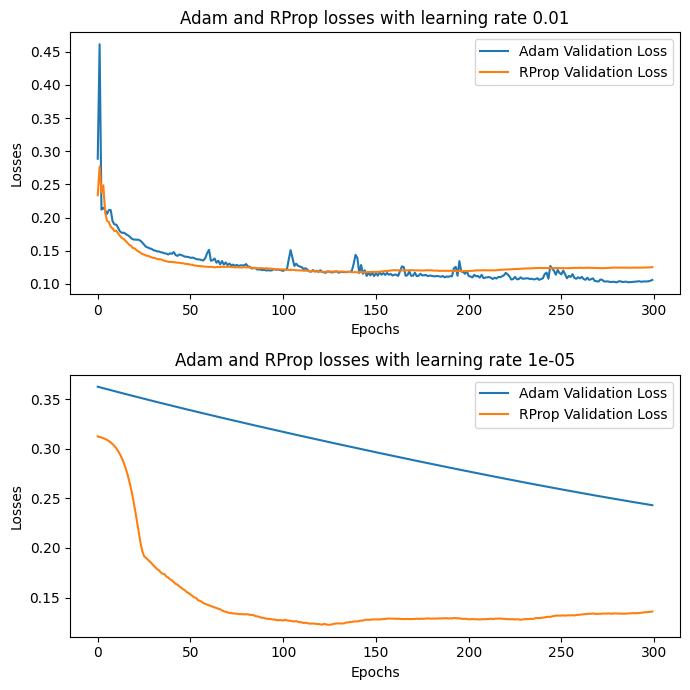

In [143]:

act_funct = nn.Tanh()
num_epochs = 300
learning_rate = [0.01, 0.00001]

fig,pos = plt.subplots(len(learning_rate),1,figsize=(7,7))

for i in range(len(learning_rate)):

    stack = nn.Sequential(
        nn.Linear(12, 128),
        act_funct,
        nn.Linear(128, 128),
        act_funct,
        nn.Linear(128, 128),
        act_funct,
        nn.Linear(128, 32),
        act_funct,
        nn.Linear(32, 3),
    )

    model = NeuralNetwork(nn.MSELoss(), num_epochs , stack, learning_rate[i], df, optim.Rprop)
    epoch_accuracy_train, epoch_accuracy_val, epoch_loss, epoch_val_loss = model.run_full(False, True)

    stack = nn.Sequential(
        nn.Linear(12, 128),
        act_funct,
        nn.Linear(128, 128),
        act_funct,
        nn.Linear(128, 128),
        act_funct,
        nn.Linear(128, 32),
        act_funct,
        nn.Linear(32, 3),
    )

    model = NeuralNetwork(nn.MSELoss(), num_epochs , stack, learning_rate[i], df, optim.Adam)
    epoch_accuracy_train_a, epoch_accuracy_val_a, epoch_loss_a, epoch_val_loss_a = model.run_full(False, True)

    pos[i].plot(range(num_epochs),epoch_val_loss_a, label="Adam Validation Loss")
    pos[i].plot(range(num_epochs),epoch_val_loss, label="RProp Validation Loss")
    pos[i].set_xlabel("Epochs")
    pos[i].set_ylabel("Losses")
    pos[i].set_title(f"Adam and RProp losses with learning rate {learning_rate[i]}")
    pos[i].legend()



plt.tight_layout()

## 2.3 Accuracy

In [163]:
stack = nn.Sequential(
    nn.Linear(12, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 32),
    act_funct,
    nn.Linear(32, 3),
)
accuracy = []
loss = []

model = NeuralNetwork(nn.MSELoss(),300 , stack, 0.01, df, optim.Adam)
test_accuracy, test_loss = model.run_kfold_full(False)

model.reset_weights(model.model)

accuracy.append(test_accuracy)
loss.append(test_loss)

print('-'*20 + 'Arc2' + '-'*20)
print(f'Accuracies {accuracy}')
print(f'Losses {loss}')
print(f'Average accuracy {np.mean(accuracy)}')
print(f'Average loss {np.mean(loss)}')

stack = nn.Sequential(
    nn.Linear(12, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 128),
    act_funct,
    nn.Linear(128, 32),
    act_funct,
    nn.Linear(32, 3),
)
accuracy = []
loss = []

model = NeuralNetwork(nn.MSELoss(),300 , stack, 0.001, df, optim.Rprop)
test_accuracy, test_loss = model.run_kfold_full(False)

model.reset_weights(model.model)

accuracy.append(test_accuracy)
loss.append(test_loss)

print('-'*20 + 'Arc2' + '-'*20)
print(f'Accuracies {accuracy}')
print(f'Losses {loss}')
print(f'Average accuracy {np.mean(accuracy)}')
print(f'Average loss {np.mean(loss)}')

--------------------Arc2--------------------
Accuracies [[0.8228980302810669, 0.8799282908439636, 0.8387096524238586, 0.8243727684020996, 0.8530465960502625]]
Losses [[0.09579796344041824, 0.07216935604810715, 0.08808575570583344, 0.09255565702915192, 0.09104443341493607]]
Average accuracy 0.8437910676002502
Average loss 0.08793063312768937
--------------------Arc2--------------------
Accuracies [[0.7978532910346985, 0.7974910140037537, 0.781361997127533, 0.8136200904846191, 0.8387096524238586]]
Losses [[0.12169411778450012, 0.10826709121465683, 0.11375391483306885, 0.11117521673440933, 0.0902421623468399]]
Average accuracy 0.8058072090148926
Average loss 0.109026500582695
